In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('merged_file_insta1.csv')

In [3]:
df = pd.read_csv('merged_file_final_fb1.csv')

In [4]:
df = pd.concat(
    map(pd.read_csv, ['merged_file_insta1.csv', 'merged_file_final_fb1.csv']), ignore_index=True)
df = df.dropna()
print(df)

      Child Smile Female   Male  PeopleNumber   Text close_up Indoors  \
0      True  True   True  False             1  False    False   False   
1     False  True   True   True             2  False    False   False   
2     False  True   True  False             1  False    False   False   
3      True  True   True  False             1  False    False   False   
4      True  True  False   True             1  False    False   False   
...     ...   ...    ...    ...           ...    ...      ...     ...   
4119      1     1      1      1             2      0        0       0   
4120      0     0      0      0             0      1        0       0   
4121      0     1      1      1             2      0        0       0   
4122      1     1      0      1             2      0        0       0   
4123      0     1      1      1             2      1        0       0   

     Outdoors dominantColor  ...  Total Interactions  Contrast  ANGRY CALM  \
0       False          cyan  ...             

In [5]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    
    df['LOGO'] = df['LOGO'].astype('bool')
    df['ANGRY'] = df['ANGRY'].astype('bool')
    df['CALM'] = df['CALM'].astype('bool')
    df['CONFUSED'] = df['CONFUSED'].astype('bool')
    df['DISGUSTED'] = df['DISGUSTED'].astype('bool')
    df['FEAR'] = df['FEAR'].astype('bool')
    df['HAPPY'] = df['HAPPY'].astype('bool')
    df['SAD'] = df['SAD'].astype('bool')
    df['SURPRISED'] = df['SURPRISED'].astype('bool')
    return df

In [6]:
df = change_types(df)

In [7]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                      bool
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                     bool
CALM                      bool
CONFUSED                  bool
DISGUSTED                 bool
FEAR                      bool
HAPPY                     bool
SAD                       bool
SURPRISED                 bool
dtype: object

In [8]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,Followers at Posting,Total Interactions
count,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,6343522.6,50491.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,10134479.4,307310.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,87607.8,124.8
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,866633.0,387.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,8106419.2,10786.2
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0


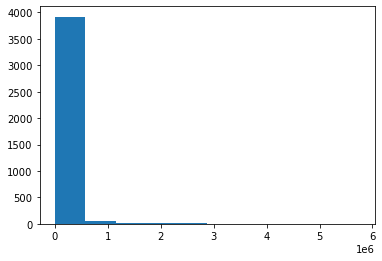

In [9]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [10]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [11]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,Followers at Posting,Total Interactions
count,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0,3618.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,4964171.1,3800.4
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,9188338.0,6522.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,77250.2,110.2
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,394945.0,301.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1995020.2,4012.5
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,29486754.0,25440.0


In [12]:
new_df[new_df['Total Interactions']>10000].count()

Child                   626
Smile                   626
Female                  626
Male                    626
PeopleNumber            626
Text                    626
close_up                626
Indoors                 626
Outdoors                626
dominantColor           626
LOGO                    626
Followers at Posting    626
Total Interactions      626
Contrast                626
ANGRY                   626
CALM                    626
CONFUSED                626
DISGUSTED               626
FEAR                    626
HAPPY                   626
SAD                     626
SURPRISED               626
dtype: int64

In [13]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0       4.593569
1       3.093195
2       3.393552
3       4.390779
4       5.781499
          ...   
4119    1.760828
4120    1.379175
4121    1.055932
4122    0.856490
4123    0.594462
Length: 3618, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    3618.000000
mean        2.396957
std         4.386693
min         0.004986
25%         0.407134
50%         1.432157
75%         2.865174
max       139.164638
dtype: float64

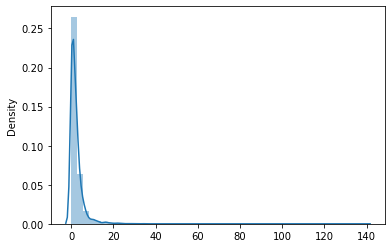

In [14]:
sns.distplot(y)
y.describe()

In [15]:
y[y<y.mean()].count()

2452

In [16]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,True,HIGH,False,False,False,False,False,True,False,False
1,0,1,1,1,2,0,0,0,0,green,True,HIGH,False,False,False,False,False,True,False,False
2,0,1,1,0,1,0,0,0,0,grey,True,HIGH,False,True,False,False,False,False,False,False
3,1,1,1,0,1,0,0,0,1,grey,True,HIGH,False,True,False,False,False,False,False,False
4,1,1,0,1,1,0,0,0,0,cyan,True,HIGH,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,cyan,True,HIGH,False,True,False,False,False,True,False,False
4120,0,0,0,0,0,1,0,0,0,blue,True,LOW,False,False,False,False,False,False,False,False
4121,0,1,1,1,2,0,0,0,0,cyan,True,HIGH,False,True,False,False,False,False,False,False
4122,1,1,0,1,2,0,0,0,0,grey,True,HIGH,False,True,False,False,False,False,True,False


In [17]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,0,0,0,0,True,...,1,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,1,0,0,0,1,True,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
4120,0,0,0,0,0,1,0,0,0,True,...,0,0,0,0,0,0,0,0,0,1
4121,0,1,1,1,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
4122,1,1,0,1,2,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0


In [18]:
# y = (y - y.min())/(y.max() - y.min())

In [19]:
y_new = []

for i in y:
    if i<y.mean():
        y_new.append('low')
    else:
        y_new.append('high')

In [20]:
print(y_new.count('high'))
print(y_new.count('low'))

1166
2452


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6519337016574586

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=5) # cv --> 
scores.mean()

0.6064013510312312

In [24]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

[[ 32 201]
 [ 32 459]]


In [25]:
scores = cross_val_score(clf, X, y_new, cv=10)  
scores.mean()

0.6425896450926678

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.6602209944751382

In [27]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv --> 
scores.mean()

0.47815843038827077

In [28]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6781767955801105

In [29]:
scores = cross_val_score(svc, X, y_new, cv=10) 
scores.mean()

0.6777230222984038

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.680939226519337

In [31]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv --> 
scores.mean()

0.6406574738678624

In [32]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.04
Smile 0.05
Female 0.09
Male 0.09
PeopleNumber 0.13
Text 0.03
close_up 0.02
Indoors 0.02
Outdoors 0.01
LOGO 0.04
ANGRY 0.02
CALM 0.04
CONFUSED 0.02
DISGUSTED 0.02
FEAR 0.02
HAPPY 0.06
SAD 0.02
SURPRISED 0.02
dominantColor_blue 0.03
dominantColor_brown 0.02
dominantColor_cyan 0.01
dominantColor_green 0.03
dominantColor_grey 0.01
dominantColor_orange 0.02
dominantColor_pink 0.02
dominantColor_purple 0.02
dominantColor_red 0.01
dominantColor_white 0.03
dominantColor_yellow 0.02
Contrast_HIGH 0.03
Contrast_LOW 0.01


In [33]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

PeopleNumber            0.13
Female                  0.09
Male                    0.09
HAPPY                   0.06
Smile                   0.05
LOGO                    0.04
CALM                    0.04
Child                   0.04
dominantColor_blue      0.03
dominantColor_green     0.03
Contrast_HIGH           0.03
Text                    0.03
dominantColor_white     0.03
dominantColor_brown     0.02
dominantColor_pink      0.02
dominantColor_orange    0.02
dominantColor_yellow    0.02
Indoors                 0.02
SURPRISED               0.02
SAD                     0.02
FEAR                    0.02
DISGUSTED               0.02
CONFUSED                0.02
close_up                0.02
ANGRY                   0.02
dominantColor_purple    0.02
Outdoors                0.01
dominantColor_red       0.01
dominantColor_grey      0.01
dominantColor_cyan      0.01
Contrast_LOW            0.01
dtype: float64

## Balance dataset

In [34]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [35]:
X['Targets']=y_new

In [36]:
X = downsample(X, 'Targets')
y_new = X['Targets']

In [37]:
X = X.drop('Targets', axis=1)

In [38]:
X.shape

(2332, 31)

In [39]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,0,0,0,0,0,0,1,0,False,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,True,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,2,0,0,1,0,True,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,False,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,1,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
2328,0,0,0,0,0,1,0,0,0,True,...,0,1,0,0,0,0,0,0,0,1
2329,0,1,1,0,1,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
2330,0,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [41]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5674518201284796
[[127 105]
 [ 97 138]]


In [42]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.58244111 0.59743041 0.58583691 0.60300429 0.61158798]


0.5960601409783937

In [43]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.6038543897216274
[[139  93]
 [ 92 143]]


In [44]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.602065967595188

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5738758029978587

In [46]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.5488884395879092

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6038543897216274

In [48]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.6042100522925071

In [49]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5931477516059958

In [50]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.6084917885140289

In [51]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5931477516059958

In [52]:
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

PeopleNumber            0.13
Female                  0.12
Male                    0.08
HAPPY                   0.06
CALM                    0.06
Child                   0.05
LOGO                    0.04
dominantColor_blue      0.03
Smile                   0.03
dominantColor_white     0.03
dominantColor_green     0.03
SURPRISED               0.03
Contrast_LOW            0.03
Outdoors                0.03
DISGUSTED               0.02
CONFUSED                0.02
dominantColor_yellow    0.02
Indoors                 0.02
dominantColor_brown     0.02
dominantColor_cyan      0.02
ANGRY                   0.02
FEAR                    0.02
dominantColor_red       0.02
dominantColor_pink      0.02
dominantColor_purple    0.01
close_up                0.01
dominantColor_orange    0.01
Text                    0.01
SAD                     0.01
Contrast_HIGH           0.00
dominantColor_grey      0.00
dtype: float64

## Oversampling

In [53]:
# Oversampling
indices = [i for i, x in enumerate(y_new) if x == "high"]
missing = 1286
high_df = pd.DataFrame(columns=new_df.columns)
for i in range(missing):
    i = random.choice(indices)
    ap = new_df.iloc[i]
    high_df = high_df.append(ap)
high_df.reset_index(drop=True)

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,1,2,0,0,0,0,grey,...,108,HIGH,False,True,False,False,False,False,False,False
1,0,1,0,1,1,0,0,0,0,red,...,58,HIGH,False,False,False,False,True,False,False,False
2,0,1,1,0,1,0,0,0,0,grey,...,1809,HIGH,False,False,False,False,False,True,False,False
3,0,1,1,0,1,0,0,0,0,grey,...,166,HIGH,False,False,False,False,False,True,False,False
4,0,1,1,1,2,1,0,0,0,brown,...,39,HIGH,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0,1,1,0,1,0,0,0,0,grey,...,27,HIGH,False,False,False,False,False,True,False,False
1282,1,1,1,0,2,0,1,0,1,grey,...,6973,HIGH,False,False,False,False,True,False,False,False
1283,0,1,0,1,1,0,0,0,0,cyan,...,63,HIGH,False,True,False,False,False,False,False,False
1284,1,1,1,0,2,0,0,0,0,brown,...,56,HIGH,False,True,False,False,False,True,False,False


In [54]:
upsampled = new_df.append(high_df)
upsampled = upsampled.sample(frac=1).reset_index(drop=True)
upsampled = change_types(upsampled)

In [55]:
y = upsampled['Total Interactions']
y = (y/upsampled['Followers at Posting'])*1000
y

0       0.745738
1       1.933931
2       0.157135
3       0.115269
4       1.238103
          ...   
4899    4.617254
4900    2.965289
4901    0.508018
4902     6.53438
4903    5.428757
Length: 4904, dtype: object

In [56]:
X = pd.get_dummies(data=upsampled.drop(['Total Interactions','Followers at Posting'], axis=1))
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,1,1,0,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,1,0,True,...,0,1,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,1,1,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,0,0,0,0,0,0,0,0,0,False,...,0,1,0,0,0,0,0,0,0,1
4900,1,1,1,1,2,1,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
4901,1,1,1,1,2,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
4902,0,0,0,0,0,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0


In [57]:
X['Targets']=y_new
X = downsample(X, 'Targets')
y_new = X['Targets']
X = X.drop('Targets', axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [59]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5588865096359743
[[132 100]
 [106 129]]


In [ ]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

In [ ]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

In [ ]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

In [ ]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)